In [ ]:
#| default_exp classification.explorer

# Explorer

> API details.

In [ ]:
#|export
#TODO: optimize imports
from fastcore.all import *
import numpy as np
import pandas as pd
import polvo as pv

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|hide
from nbdev.showdoc import *
from collections import defaultdict

In [ ]:
data_dir = pv.mkdir('snacks', tmp=True, exist_ok=True, overwrite=True)
data_dir = pv.download_and_extract('https://github.com/lgvaz/polvo-datasets-hub/releases/download/snacks/snacks.zip', data_dir)

  0%|          | 0/438252 [00:00<?, ?B/s]

In [ ]:
image_files = pv.get_image_files(data_dir)

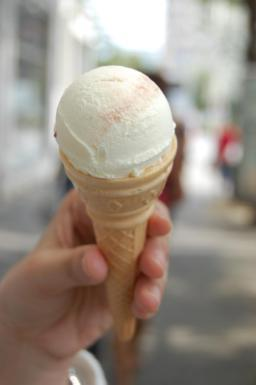

In [ ]:
image_file = image_files[25]
pv.open_image(image_file)

In [ ]:
#|export
class DataExplorer:
    def __init__(self, label_ids, idx2image, id2label, label2id):
        store_attr()
        self.grouped_y = self._group_y()
        
    def _group_y(self):
        label_df = pd.DataFrame(self.label_ids, columns=["label_id"])
        label_df['label'] = label_df['label_id'].map(self.id2label) #
        label_df["item_idx"] = label_df.index
        
        label_df = label_df.groupby("label_id").agg({"label": "first", "item_idx": list}).reset_index()
        label_df["n_samples"] = label_df.item_idx.str.len()
        label_df = label_df.sort_values("n_samples", ascending=False).reset_index(drop=True)
        return label_df

    def most_common(self):
        "Return a dataframe ordered by most common classes."
        return self.grouped_y.copy()

    def show_label_id(self, id, slice_=slice(None)):
        # TODO: can we also pick the class name to show?
        idx = self.grouped_y[self.grouped_y["label_id"] == id].index[0]
        return self.show_most_common(idx=idx, slice_=slice_)
    
    def show_label(self, label, slice_=slice(None)):
        return self.show_label_id(self.label2id(label), slice_=slice_) #

    def show_most_common(self, idx: int, slice_=slice(None)):
        item_idxs = self.grouped_y.iloc[idx].item_idx
        item_idxs = item_idxs[slice_]
        
        images = [self.idx2image(i) for i in item_idxs]
        xmax, ymax = np.max([image.size for image in images], axis=0)
        
        return pv.image_grid(images, xmax=xmax, ymax=ymax)

In [ ]:
label_ids = []
label2id = defaultdict(lambda: len(label2id))
for imgf in image_files:
    label = imgf.parent.stem
    label_ids.append(label2id[label])
    
label2id = dict(label2id)
id2label = {v: k for k, v in label2id.items()}

In [ ]:
def idx2image(idx): return pv.open_image(image_files[idx])
exp = DataExplorer(label_ids, idx2image, id2label.__getitem__, label2id.__getitem__)

In [ ]:
exp.most_common()

,label_id,label,item_idx,n_samples
0,0,cake,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",10
1,1,hot-dog,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]",10
2,2,ice-cream,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]",10


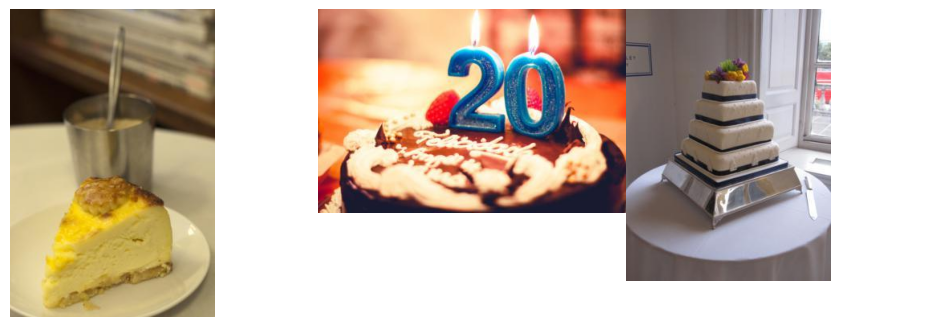

(<Figure size 1400x400 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
exp.show_label_id(0, slice_=slice(3, 6))

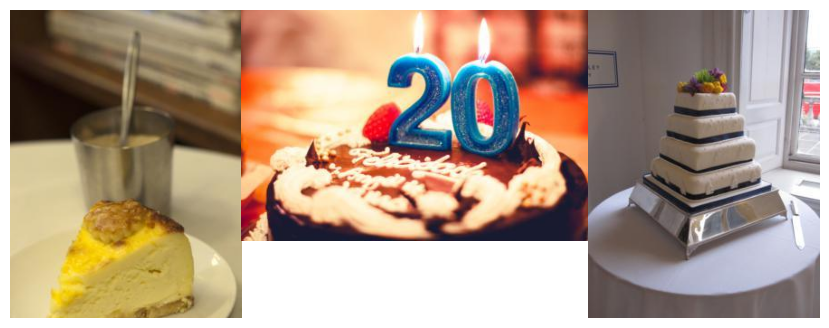

(<Figure size 1400x400 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
exp.show_label_id(0, slice_=slice(3, 6))

In [ ]:
after_item = [ToTensor(), Resize(500)]
after_batch = [IntToFloatTensor(), *aug_transforms(size=300, min_scale=0.75, max_rotate=150)]
dls = ds.dataloaders(32, after_item=after_item, after_batch=after_batch, num_workers=0)

In [ ]:
pv.show_tfms

<function polvo.common.show_tfms(dl, unique_idx=None, max_n=5, pad=0.2, ncols=2, *, show=True, xmax=None, ymax=None, nrows=None, figsize=None, ngrids=None, direction='row', axes_pad=0.02, share_all=False, aspect=True, label_mode='L', cbar_mode=None, cbar_location='right', cbar_pad=None, cbar_size='5%', cbar_set_cax=True, axes_class=None)>

In [ ]:
show_tfms = pv.show_tfms

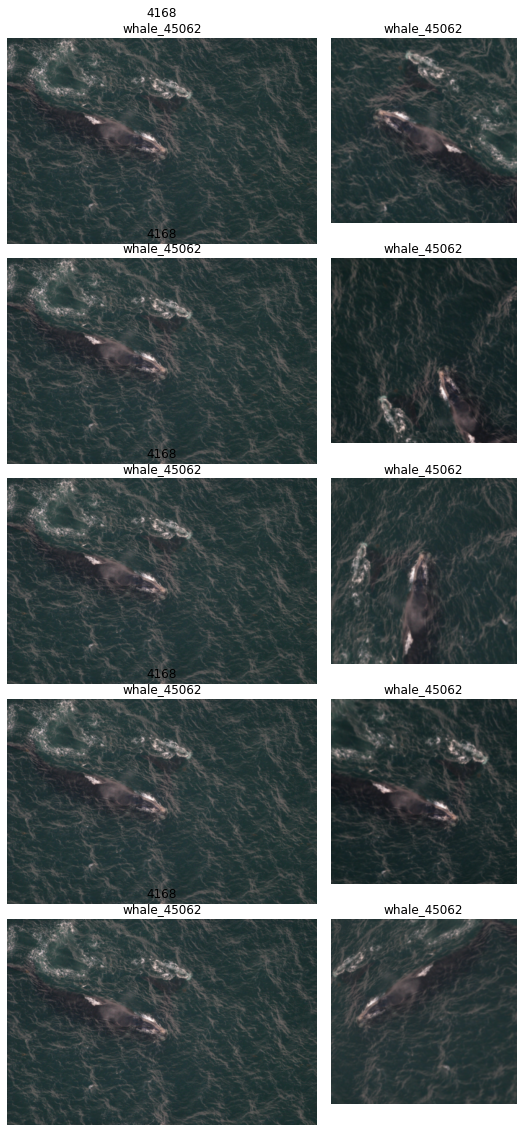

(<Figure size 1008x1440 with 20 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
show_tfms(dls.train, unique_idx=4168)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()